In [128]:
# # ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline 

In [129]:
# # trainデータ
train = pd.read_csv('train.csv')
# # testデータ
test = pd.read_csv('test.csv')

In [130]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [131]:
df = pd.DataFrame(train)

In [132]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [133]:
# 相関係数, SalePriceとの, 絶対値, ソート, 降順
df.corr().loc[:, ['SalePrice']].abs().sort_values('SalePrice', ascending = False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [134]:
# X_train = train[['OverallQual', 'TotalBsmtSF']].values
# Y_train = train['SalePrice'].values
# print(X_train, X_train.shape)
# print(Y_train, Y_train.shape)

In [153]:
X = df.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars']].values
print(X, X.shape)

[[   7 1710    2]
 [   6 1262    2]
 [   7 1786    2]
 ...
 [   7 2340    1]
 [   5 1078    1]
 [   5 1256    1]] (1460, 3)


In [154]:
y = df.loc[:, ['SalePrice']].values
print(y, y.shape)

[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]] (1460, 1)


In [155]:
# 標準化
ss = StandardScaler()
X = ss.fit_transform(X)

In [156]:
# 多項式化
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
X = quad.fit_transform(X)

In [157]:
# ホールド・アウト
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [158]:
# trainデータで学習
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [159]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
# モデルの評価
print('R^2')
print('train: %.5f' % lr.score(X_train, y_train))
print('test: %.5f' % lr.score(X_test, y_test))
# 若干過学習？

# 多項式化あり
# R^2
# train: 0.80266
# test: 0.79508

# 多項式化なし
# R^2
# train: 0.74880
# test: 0.71719

R^2
train: 0.80266
test: 0.79508


In [174]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=1)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=1)
    
    # x軸のラベルを表示
    plt.xlabel('Predicted Values')
    # y軸のラベルを表示
    plt.ylabel('Residuals')
    # 凡例を左上に表示
    plt.legend(loc='upper left')
    # 残差0の線を表示
    plt.hlines(y=0, xmin=-10, xmax=500000, color='red')
    # 上記の内容でグラフを表示
    plt.show()

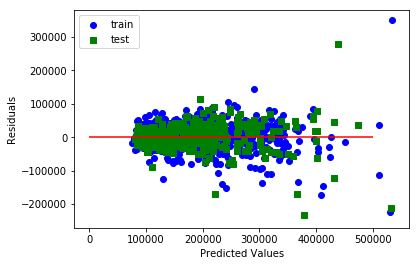

In [175]:
# 残差プロットを出力
# 線形回帰の場合
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))

In [95]:
df_test = pd.DataFrame(test)

In [96]:
print(df_test.isnull().sum())
# # testデータの欠損値を補完する
df_test.loc[:, ['GarageCars']] = df_test.loc[:, ['GarageCars']].fillna(df_test.loc[:, ['GarageCars']].mean())
print(df_test)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [97]:
X_test = df_test.loc[:, ['OverallQual', 'GrLivArea', 'GarageCars']].values
X_test = ss.fit_transform(X_test)
# 多項式化
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
X_test = quad.fit_transform(X_test)

In [98]:
y_pred = lr.predict(X_test)

In [99]:
print(y_pred, y_pred.shape, type(y_pred))
y_pred = y_pred.flatten()
print(y_pred, y_pred.shape, type(y_pred))

[[107665.18801297]
 [144855.93388616]
 [158626.75327657]
 ...
 [140038.99421349]
 [ 95030.69679968]
 [265022.15632167]] (1459, 1) <class 'numpy.ndarray'>
[107665.18801297 144855.93388616 158626.75327657 ... 140038.99421349
  95030.69679968 265022.15632167] (1459,) <class 'numpy.ndarray'>


In [101]:
test['SalePrice'] = y_pred
test[['Id','SalePrice']].to_csv('submission.csv',index=False)

[[1 60 'RL' ... 'WD' 'Normal' 208500]
 [2 20 'RL' ... 'WD' 'Normal' 181500]
 [3 60 'RL' ... 'WD' 'Normal' 223500]
 ...
 [1458 70 'RL' ... 'WD' 'Normal' 266500]
 [1459 20 'RL' ... 'WD' 'Normal' 142125]
 [1460 20 'RL' ... 'WD' 'Normal' 147500]]
